Making a big plot for the hlsp

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
import scipy.interpolate as interpolate
from astropy.convolution import convolve, Box1DKernel
from astropy.modeling import models, fitting

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [3]:
path = '/media/david/2tb_ext_hd/hddata/mega_muscles/'
mMpath = '{}v10_hlsp/'.format(path)
Mpath = '{}muscles_hlsp/'.format(path)
mMstars = os.listdir(mMpath)
print(mMstars)
Mstars = os.listdir(Mpath)
print(Mstars)
stars = Mstars+mMstars
stars = [s.upper() for s in stars]
print(stars)

['GJ1132', 'GJ15A', 'GJ163', 'GJ649', 'GJ674', 'GJ676A', 'GJ699', 'GJ729', 'GJ849', 'L-980-5', 'LHS-2686', 'TRAPPIST-1']
['gj1214', 'gj176', 'gj436', 'gj551', 'gj581', 'gj667c', 'gj832', 'gj876', 'hd40307', 'hd85512', 'hd97658', 'v-eps-eri']
['GJ1214', 'GJ176', 'GJ436', 'GJ551', 'GJ581', 'GJ667C', 'GJ832', 'GJ876', 'HD40307', 'HD85512', 'HD97658', 'V-EPS-ERI', 'GJ1132', 'GJ15A', 'GJ163', 'GJ649', 'GJ674', 'GJ676A', 'GJ699', 'GJ729', 'GJ849', 'L-980-5', 'LHS-2686', 'TRAPPIST-1']


In [4]:
mMspecs = glob.glob('{}*/hlsp_muscles_multi_multi_*_broadband_v*_adapt-const-res-sed.fits'.format(mMpath))
print(mMspecs)
Mspecs = glob.glob('{}*/hlsp_muscles_multi_multi_*_broadband_v*_adapt-const-res-sed.fits'.format(Mpath))
print(Mspecs)
specs = Mspecs+mMspecs

['/media/david/2tb_ext_hd/hddata/mega_muscles/v10_hlsp/GJ1132/hlsp_muscles_multi_multi_gj1132_broadband_v10_adapt-const-res-sed.fits', '/media/david/2tb_ext_hd/hddata/mega_muscles/v10_hlsp/GJ15A/hlsp_muscles_multi_multi_gj15a_broadband_v10_adapt-const-res-sed.fits', '/media/david/2tb_ext_hd/hddata/mega_muscles/v10_hlsp/GJ163/hlsp_muscles_multi_multi_gj163_broadband_v10_adapt-const-res-sed.fits', '/media/david/2tb_ext_hd/hddata/mega_muscles/v10_hlsp/GJ649/hlsp_muscles_multi_multi_gj649_broadband_v10_adapt-const-res-sed.fits', '/media/david/2tb_ext_hd/hddata/mega_muscles/v10_hlsp/GJ674/hlsp_muscles_multi_multi_gj674_broadband_v10_adapt-const-res-sed.fits', '/media/david/2tb_ext_hd/hddata/mega_muscles/v10_hlsp/GJ676A/hlsp_muscles_multi_multi_gj676a_broadband_v10_adapt-const-res-sed.fits', '/media/david/2tb_ext_hd/hddata/mega_muscles/v10_hlsp/GJ699/hlsp_muscles_multi_multi_gj699_broadband_v10_adapt-const-res-sed.fits', '/media/david/2tb_ext_hd/hddata/mega_muscles/v10_hlsp/GJ729/hlsp_muscle

In [5]:
stars

['GJ1214',
 'GJ176',
 'GJ436',
 'GJ551',
 'GJ581',
 'GJ667C',
 'GJ832',
 'GJ876',
 'HD40307',
 'HD85512',
 'HD97658',
 'V-EPS-ERI',
 'GJ1132',
 'GJ15A',
 'GJ163',
 'GJ649',
 'GJ674',
 'GJ676A',
 'GJ699',
 'GJ729',
 'GJ849',
 'L-980-5',
 'LHS-2686',
 'TRAPPIST-1']

In [6]:
teffs = np.array([2935, 3416, 3281,2800,3295,3327,3816,3062,4783,4305,5156, 5162, 3196, 3601,3460, 3621,3404,4014, 3223,3248,3492, 3778,3119, 2619])
args = np.argsort(teffs)[::-1]
stars_sort = np.array(stars)[args]
specs_sort = np.array(specs)[args]
teffs_sort = teffs[args]

print(stars_sort)

['V-EPS-ERI' 'HD97658' 'HD40307' 'HD85512' 'GJ676A' 'GJ832' 'L-980-5'
 'GJ649' 'GJ15A' 'GJ849' 'GJ163' 'GJ176' 'GJ674' 'GJ667C' 'GJ581' 'GJ436'
 'GJ729' 'GJ699' 'GJ1132' 'LHS-2686' 'GJ876' 'GJ1214' 'GJ551' 'TRAPPIST-1']


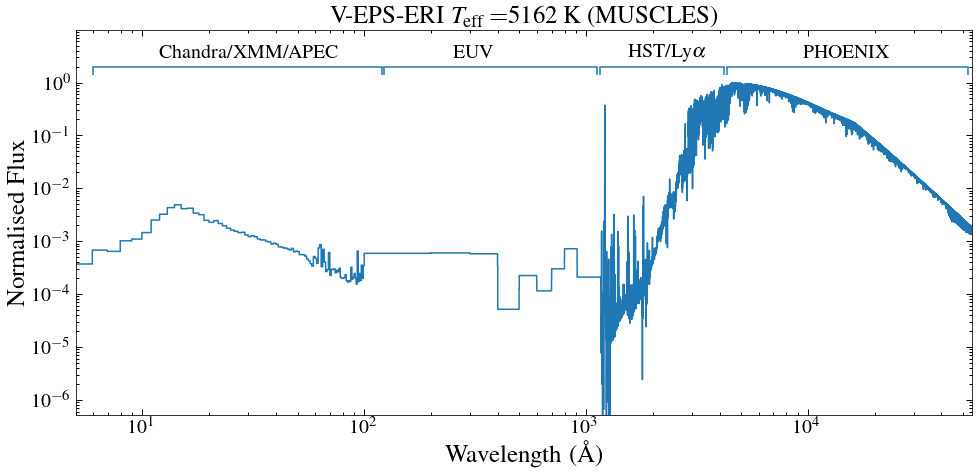

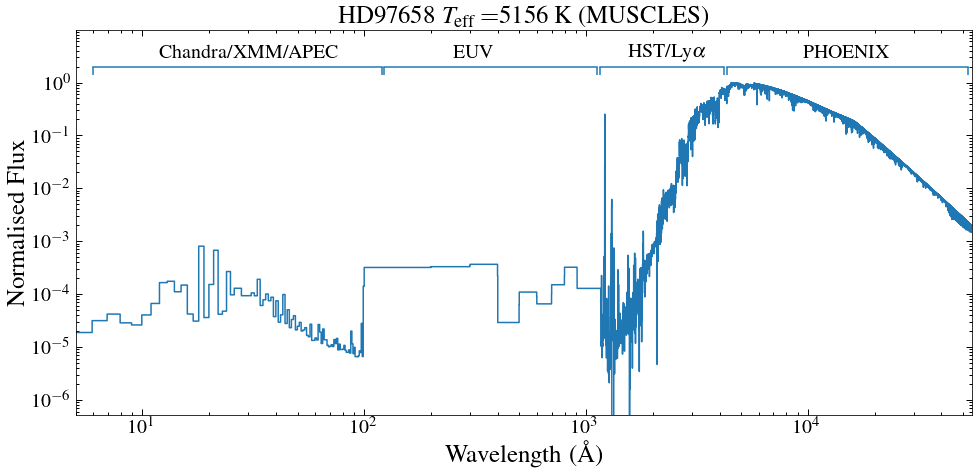

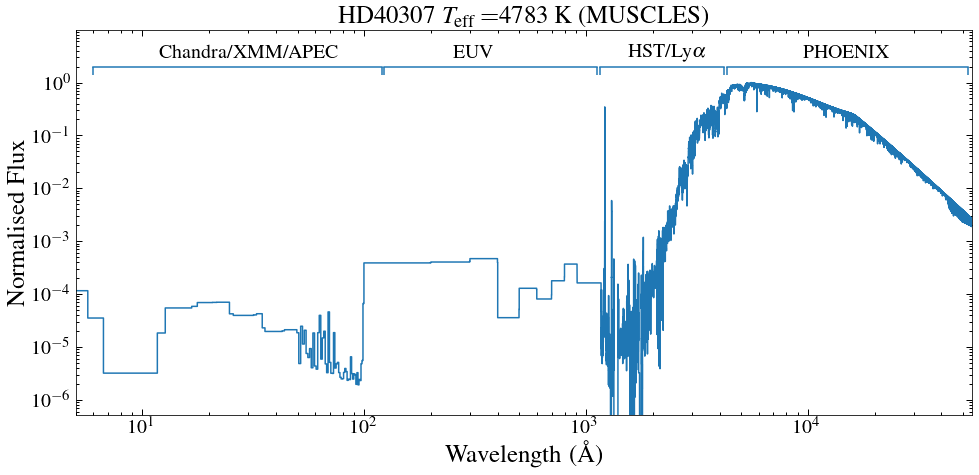

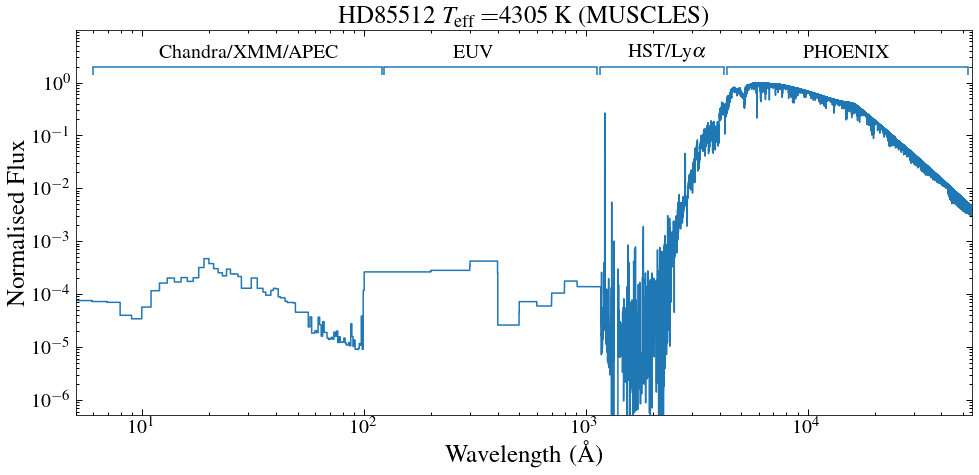

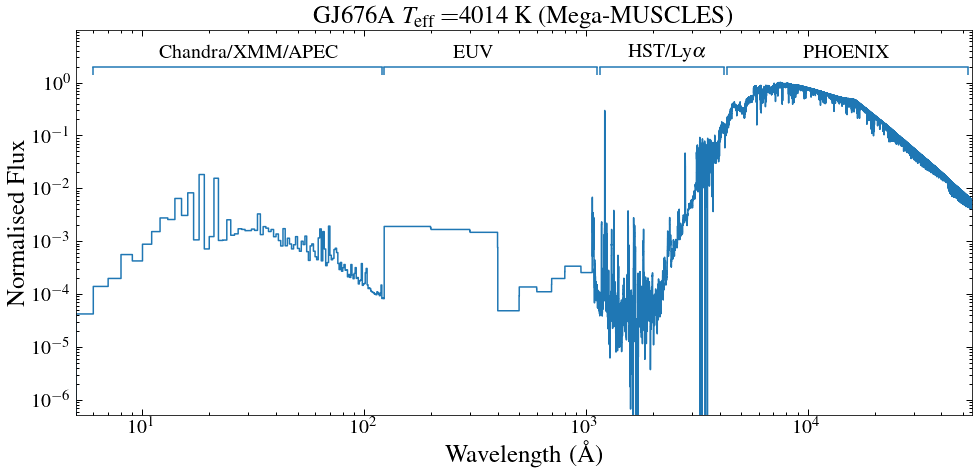

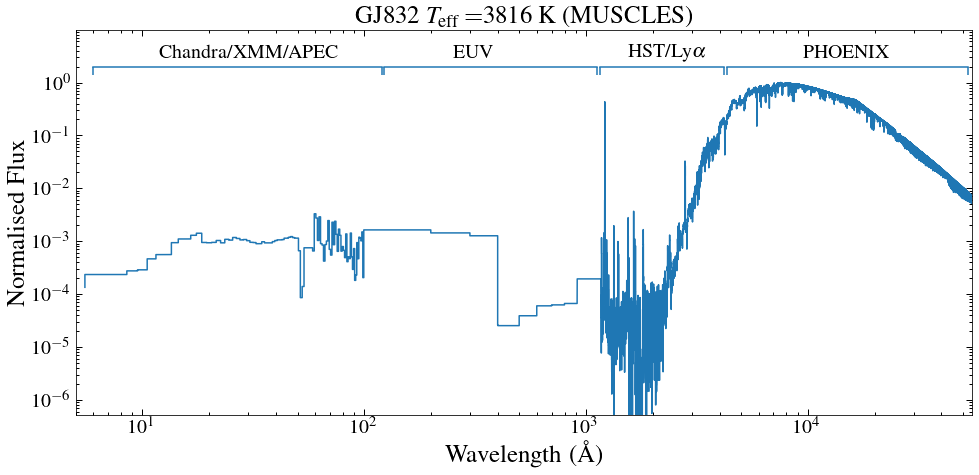

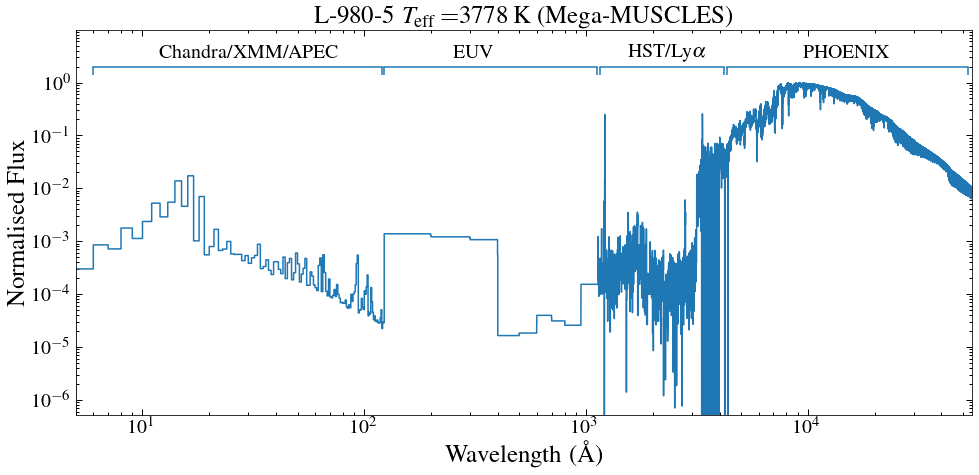

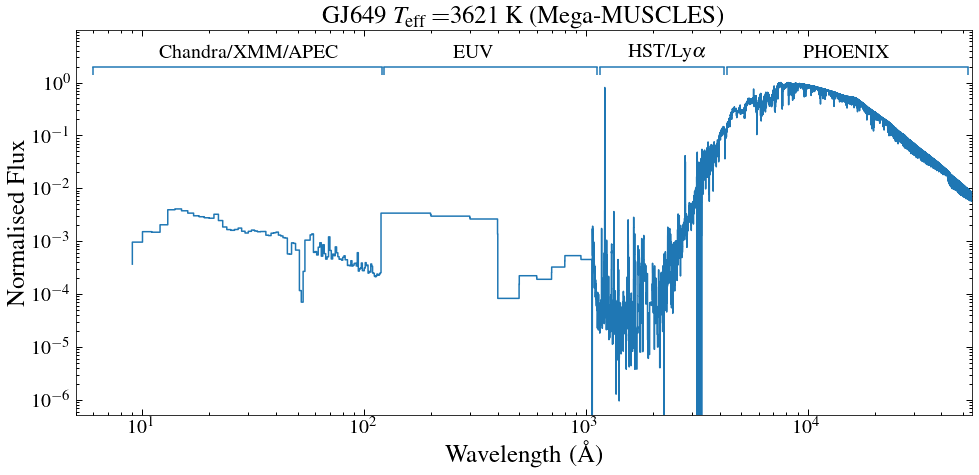

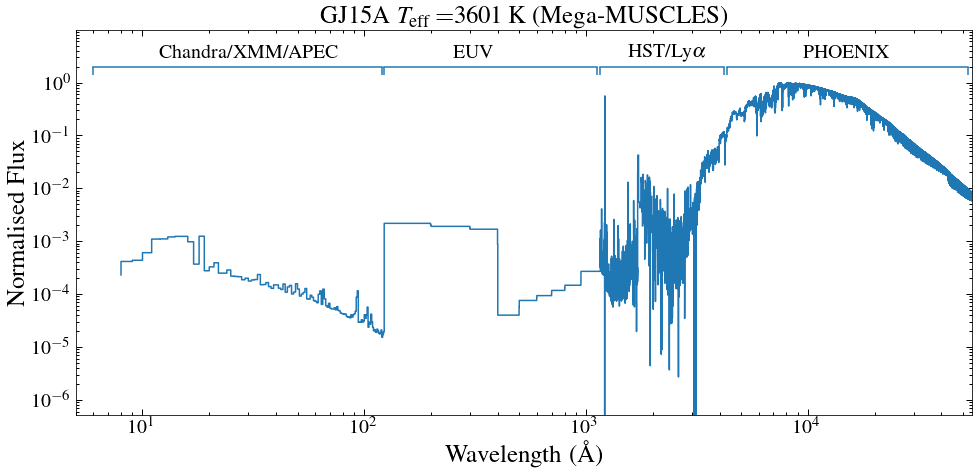

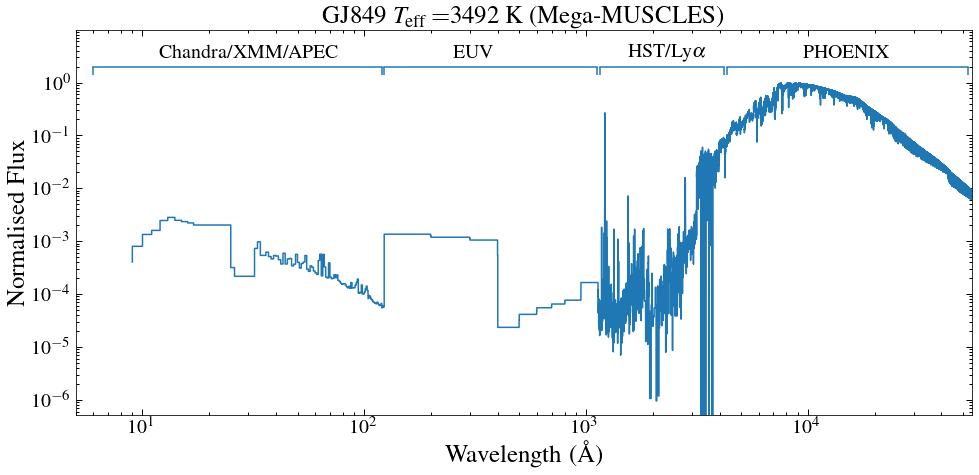

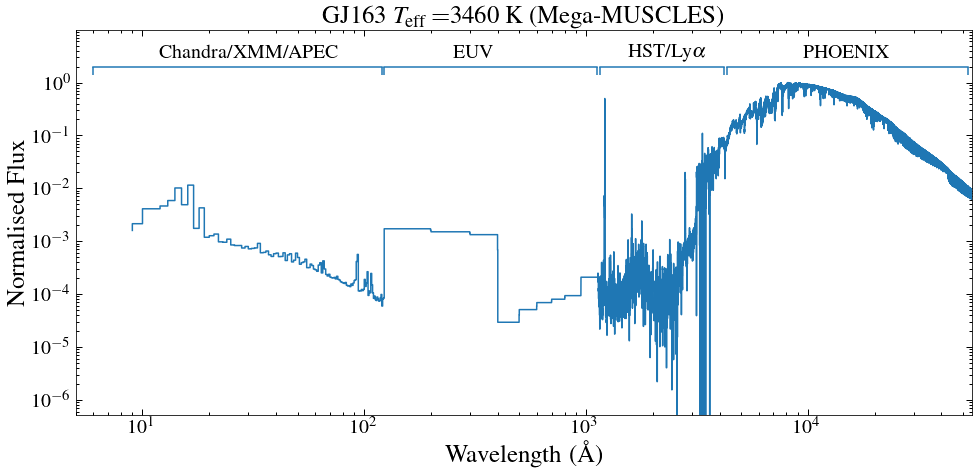

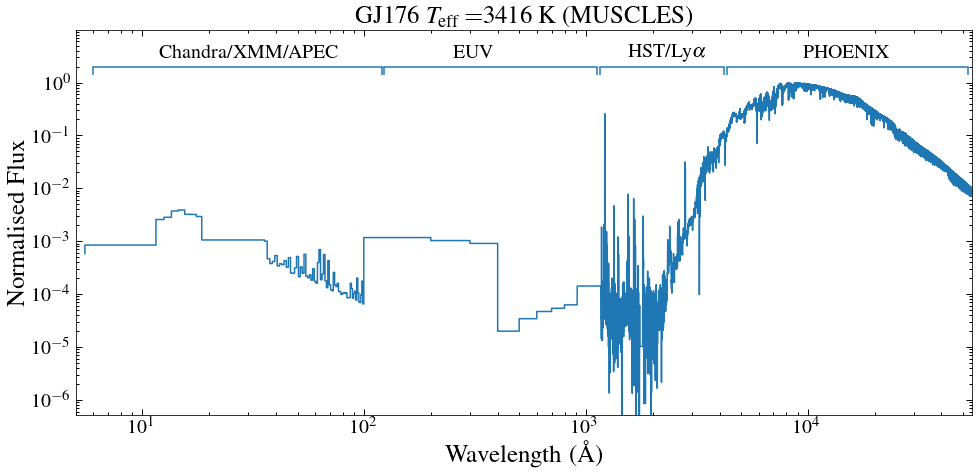

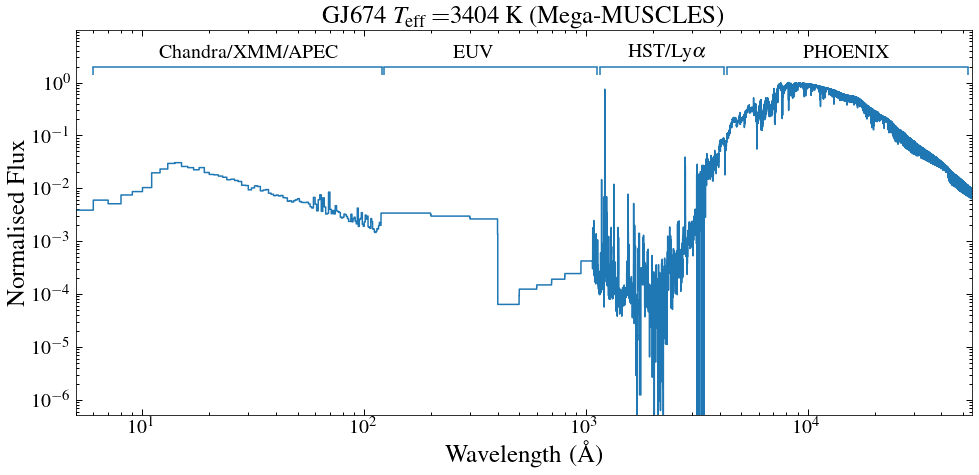

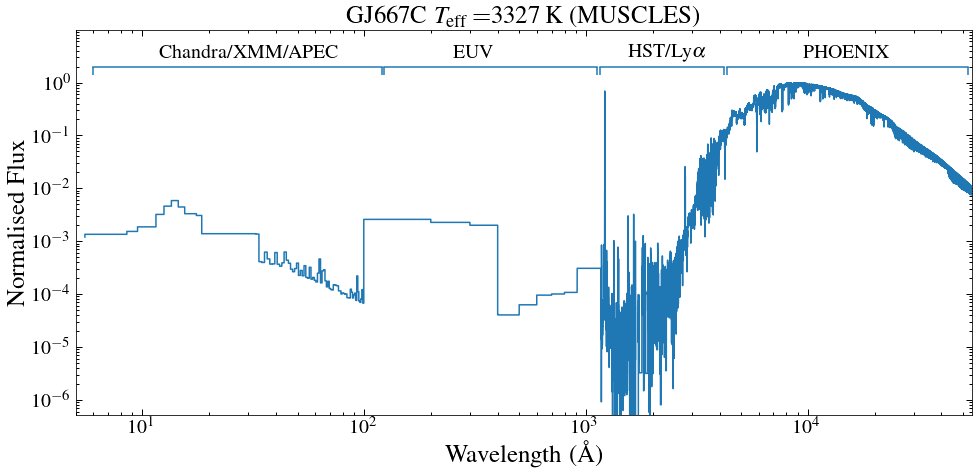

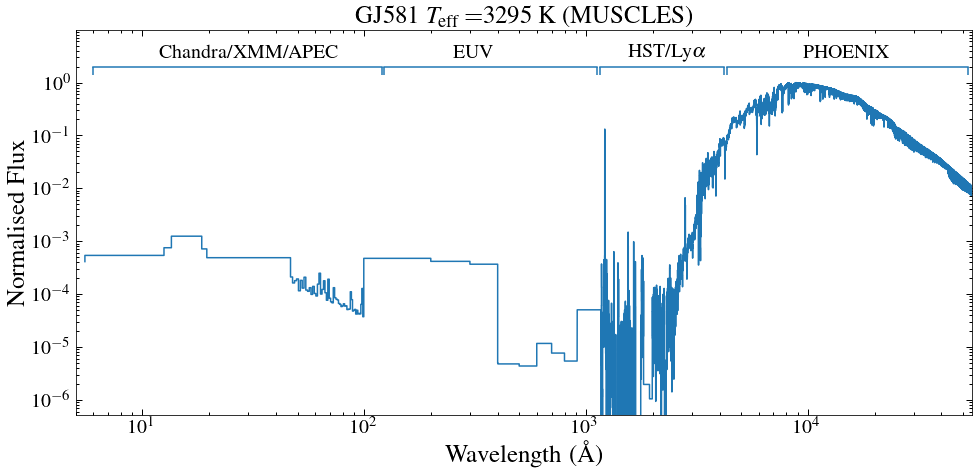

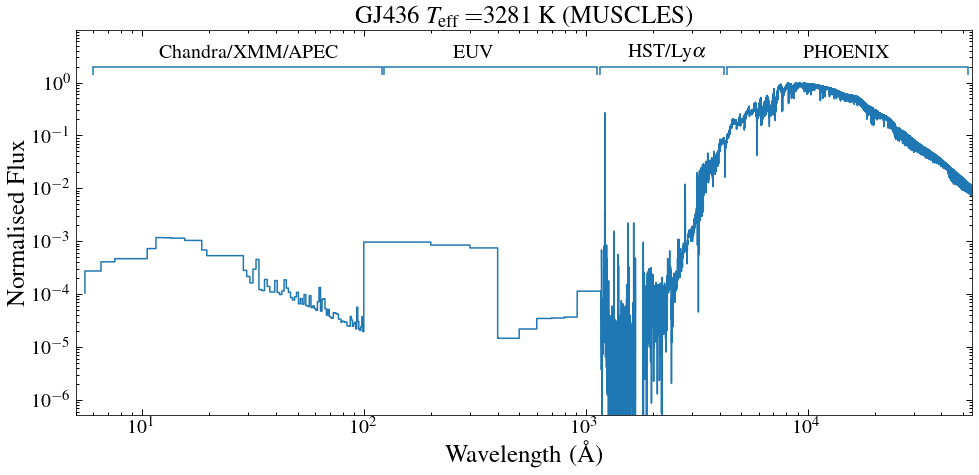

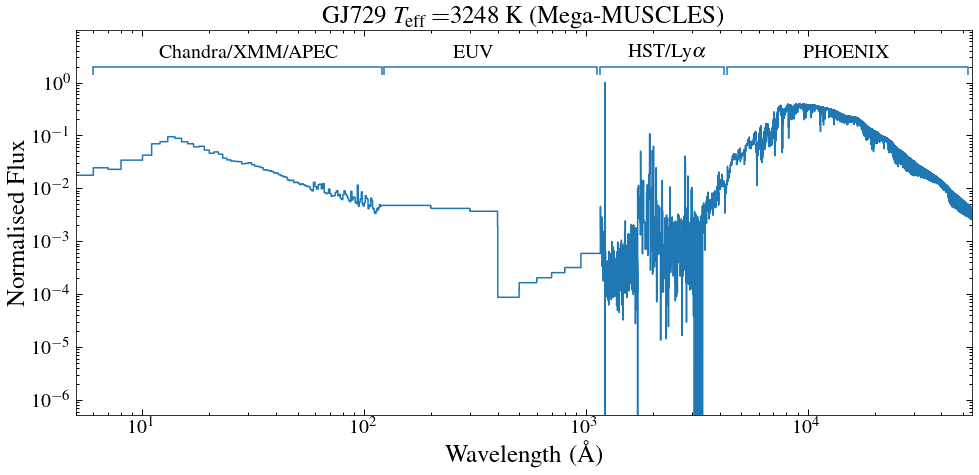

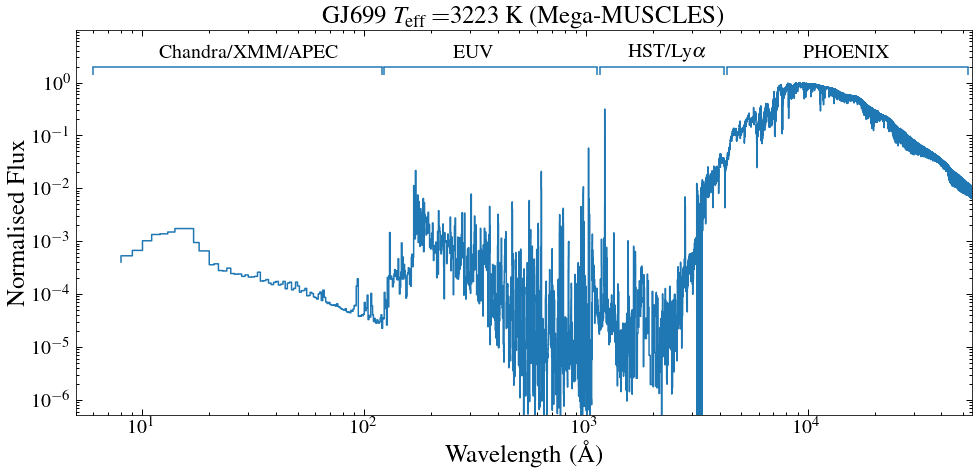

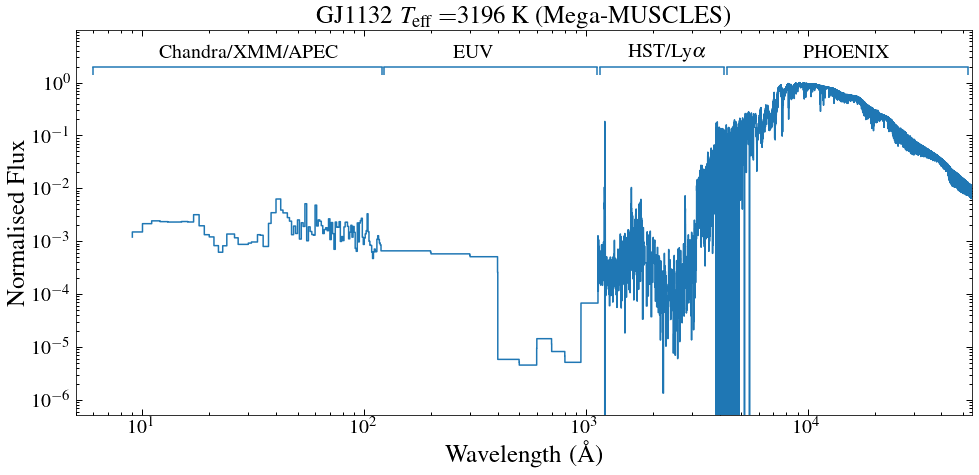

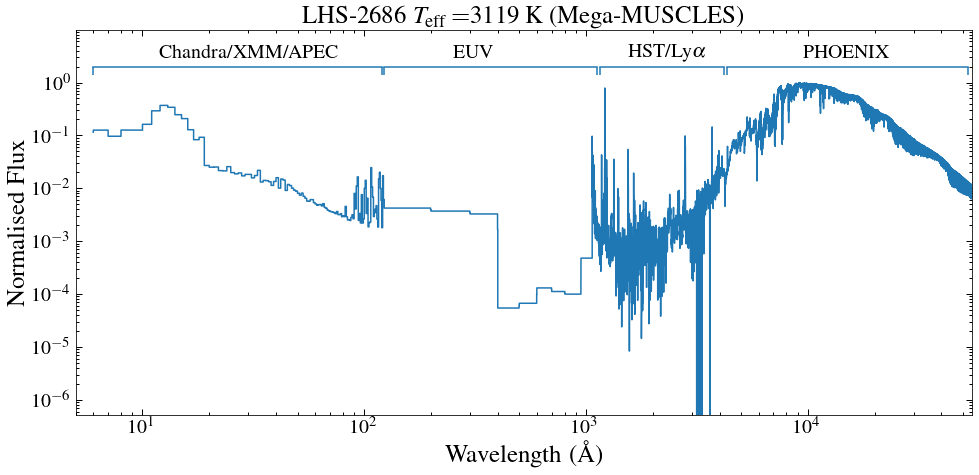

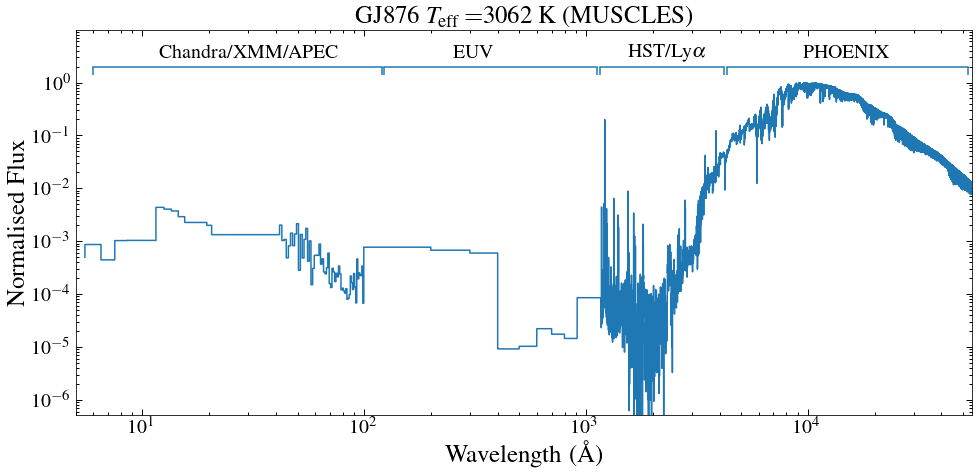

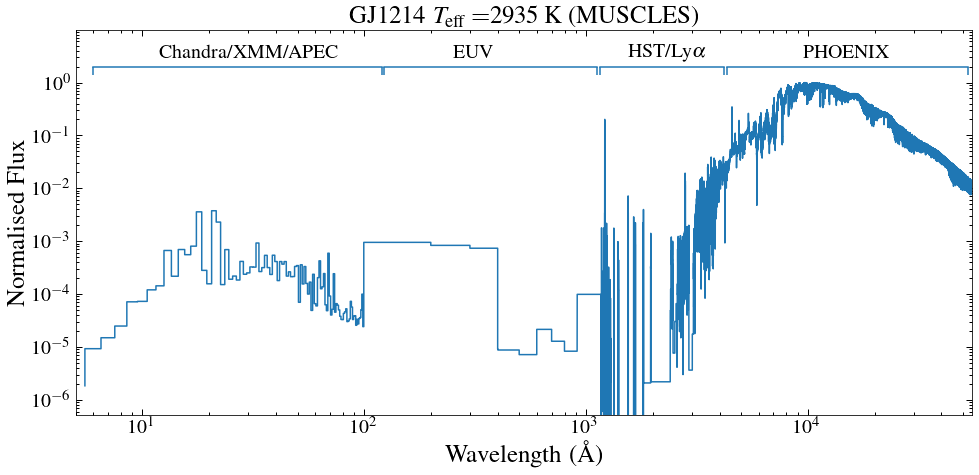

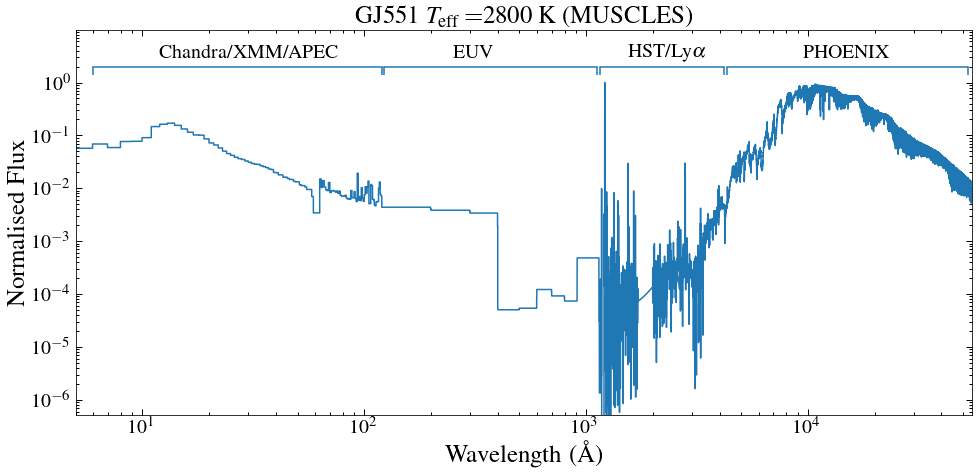

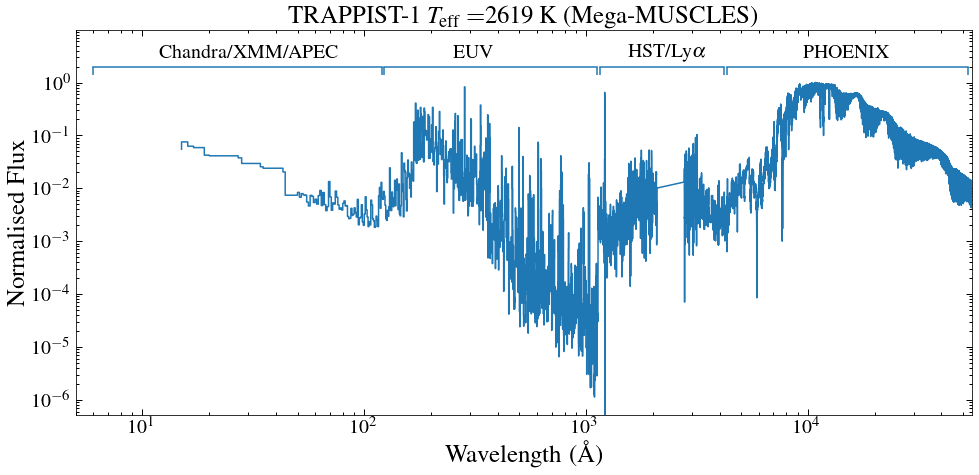

In [7]:


for i, spec in enumerate(specs_sort):
    plt.figure(figsize=(14, 7))

    # print(os.path.split(spec)[1])
    data = fits.getdata(spec, 1)
    w, f = data['WAVELENGTH'], data['FLUX']
    plt.step(w, f/np.max(f))
    survey = 'MUSCLES'
    if spec in mMspecs:
        survey = 'Mega-MUSCLES'
    plotname = '{} '.format(stars_sort[i]) + r'$T_{\mathrm{eff}} = $' +'{}\,K ({})'.format(teffs_sort[i], survey)
    plt.title(plotname, size=25)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(5, 55000)
    plt.ylim(5.1e-7, 9.9)
    
    
    labely = 2
    efac = 0.3
    labelfac = 1.5

    plt.errorbar((6,120),(labely, labely), yerr= [[efac*labely,efac*labely],[0,0]], c ='C0')
    plt.annotate('Chandra/XMM/APEC', (30, labelfac*labely),  ha='center')

    plt.errorbar((123,1120),(labely, labely), yerr= [[efac*labely,efac*labely],[0,0]], c ='C0')
    plt.annotate('EUV', (250, labelfac*labely))

    plt.errorbar((1160, 4200),(labely, labely), yerr= [[efac*labely,efac*labely],[0,0]], c ='C0')
    plt.annotate(r'HST/Ly$\alpha$', (2300, labelfac*labely), ha='center')

    plt.errorbar((4301,  53000),(labely, labely), yerr= [[efac*labely,efac*labely],[0,0]], c ='C0')
    plt.annotate('PHOENIX', (15000, labelfac*labely), ha='center')
    
    
    # plt.ylabel('Flux (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=25)
    plt.ylabel('Normalised Flux', size=25)
    plt.xlabel('Wavelength (\AA)', size=25)
    plt.tight_layout()
    plt.savefig('plots/{}_bigplot.png'.format(stars_sort[i]), dpi=150, facecolor='w')
    plt.show()
    

In [8]:
import mplcyberpunk
plt.style.use("cyberpunk")

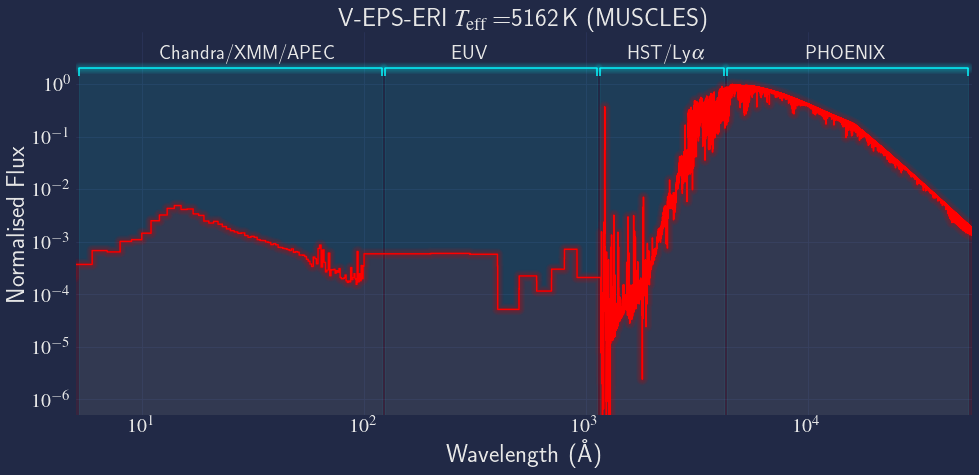

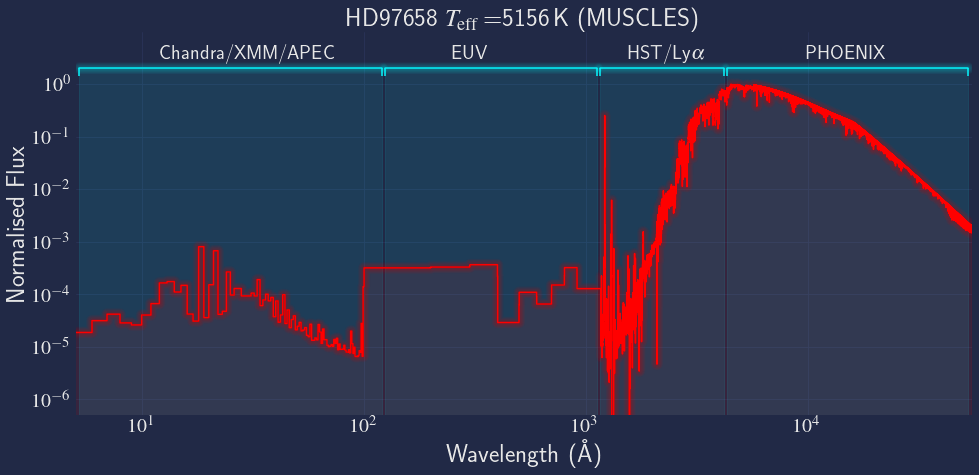

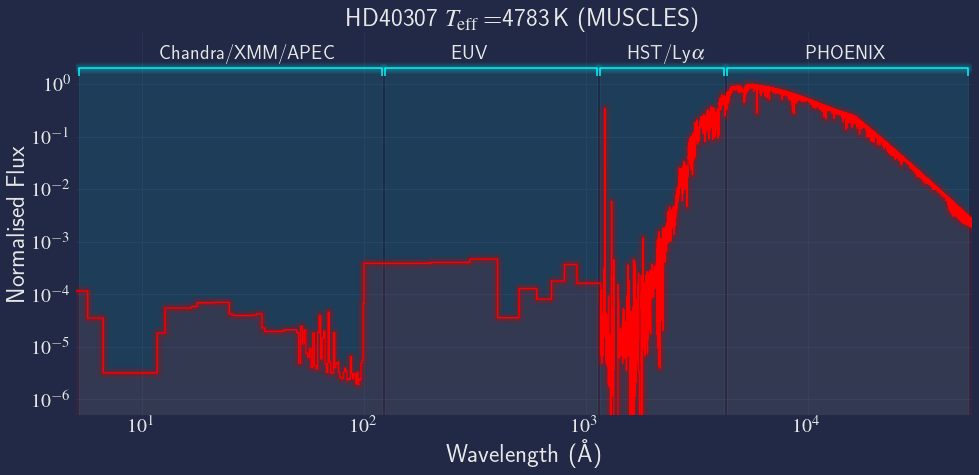

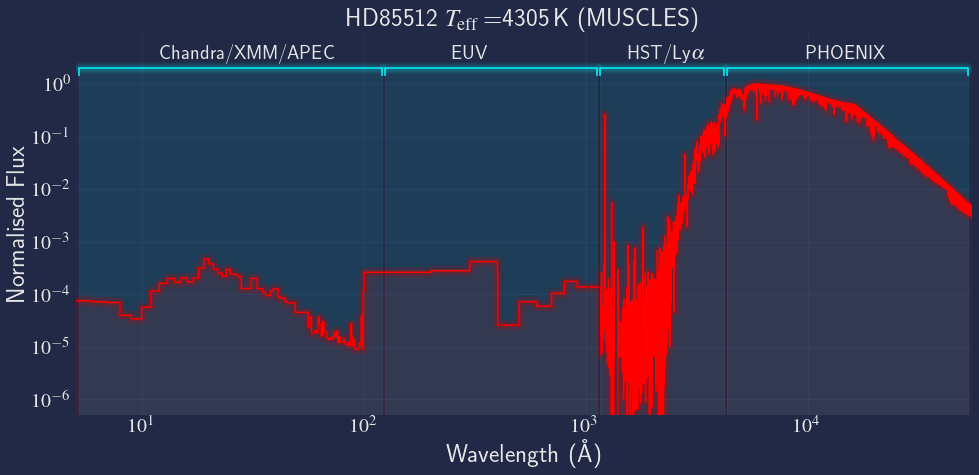

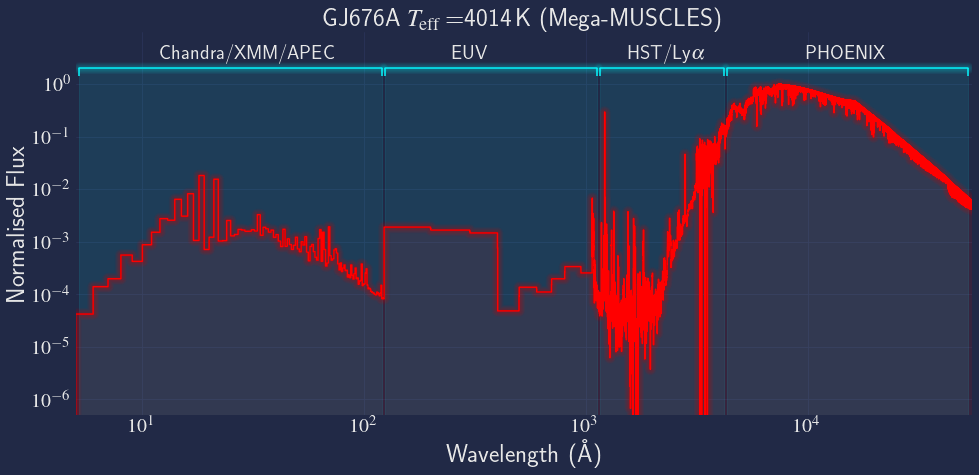

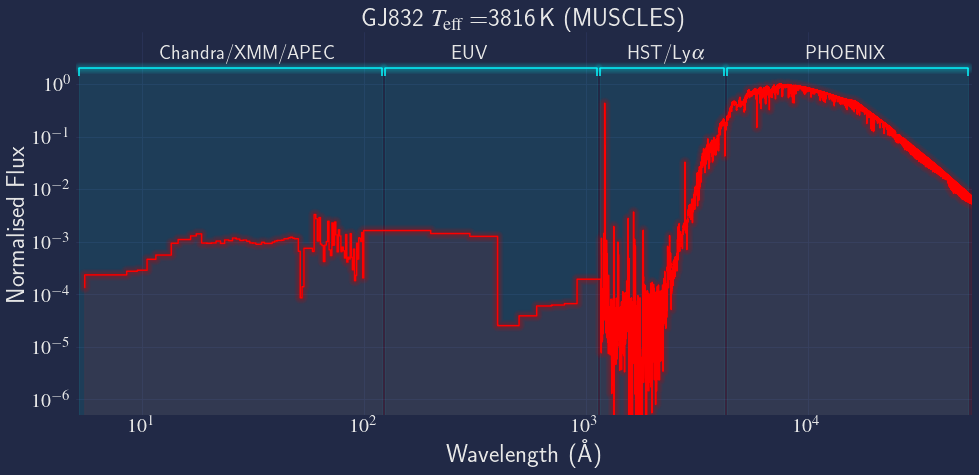

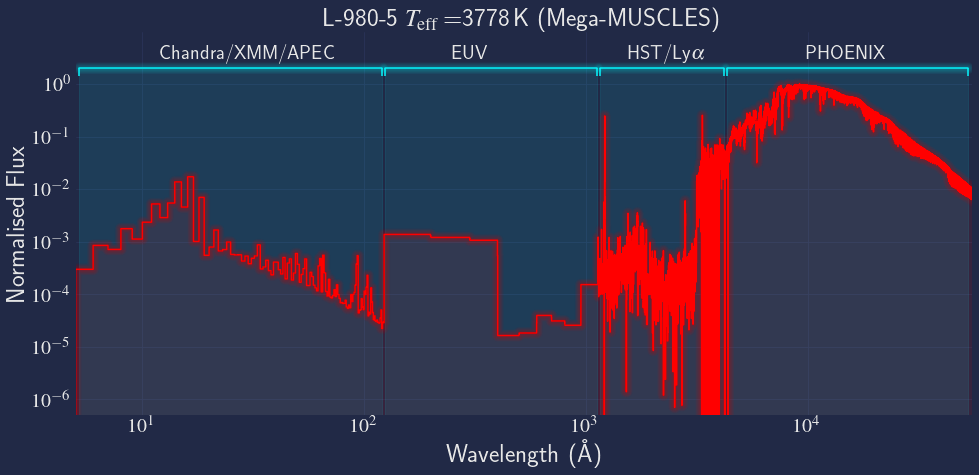

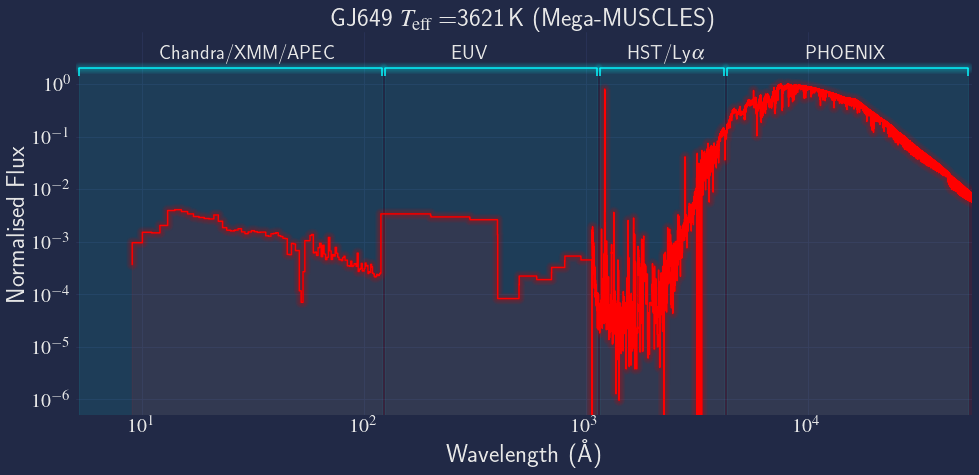

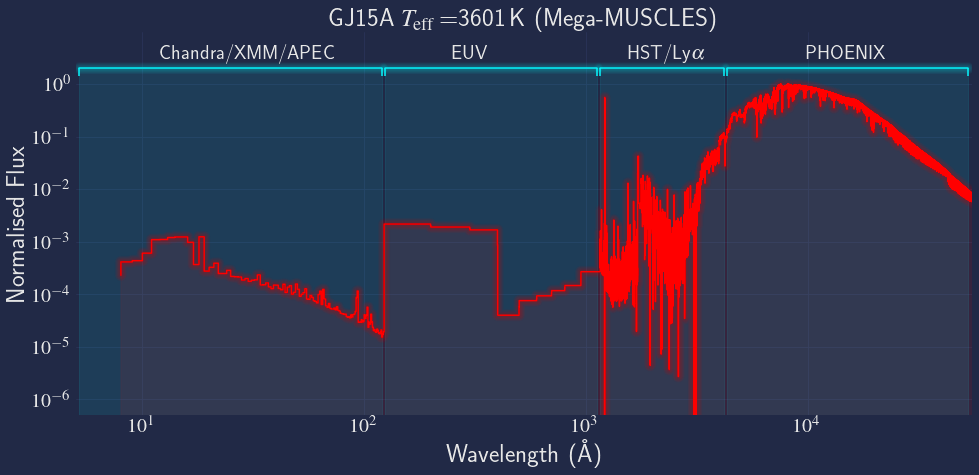

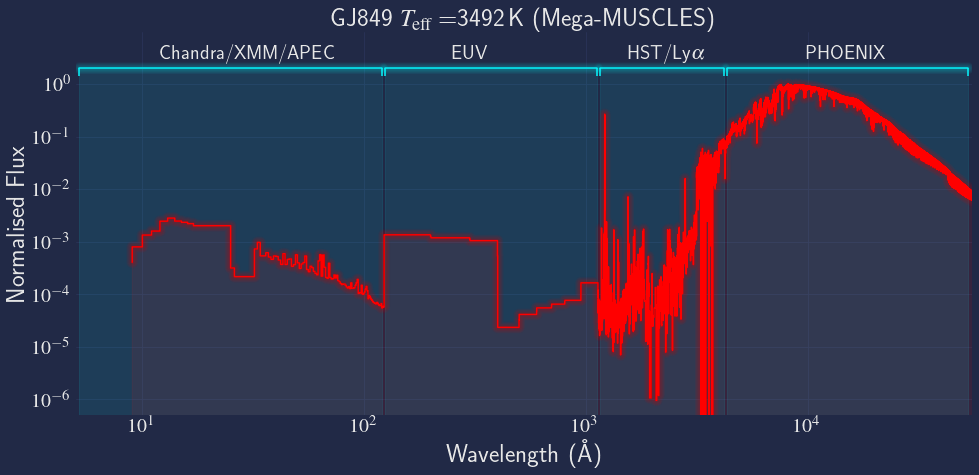

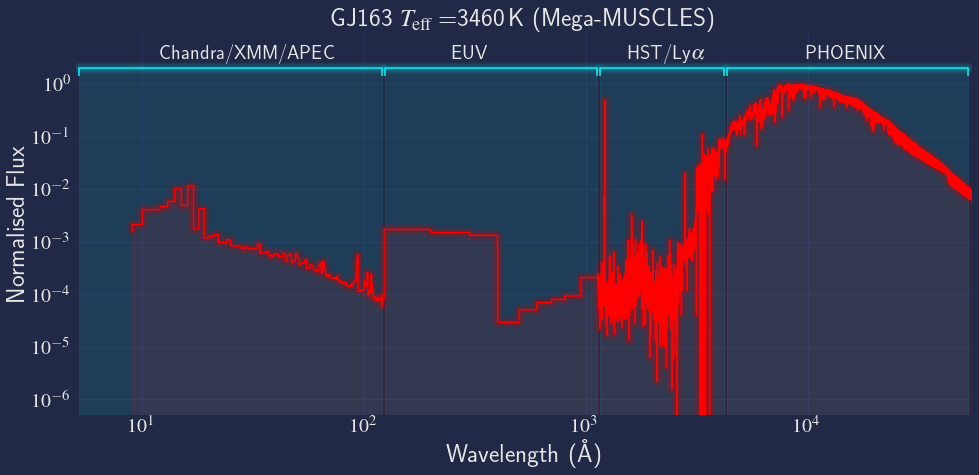

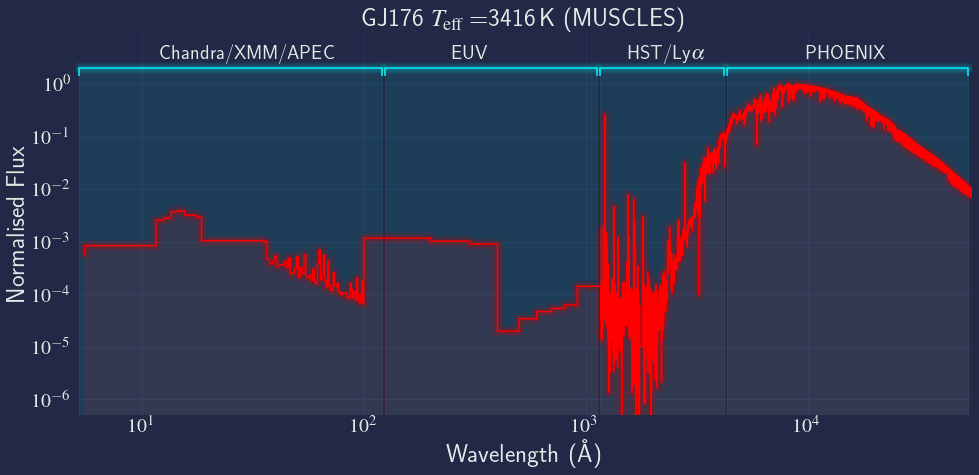

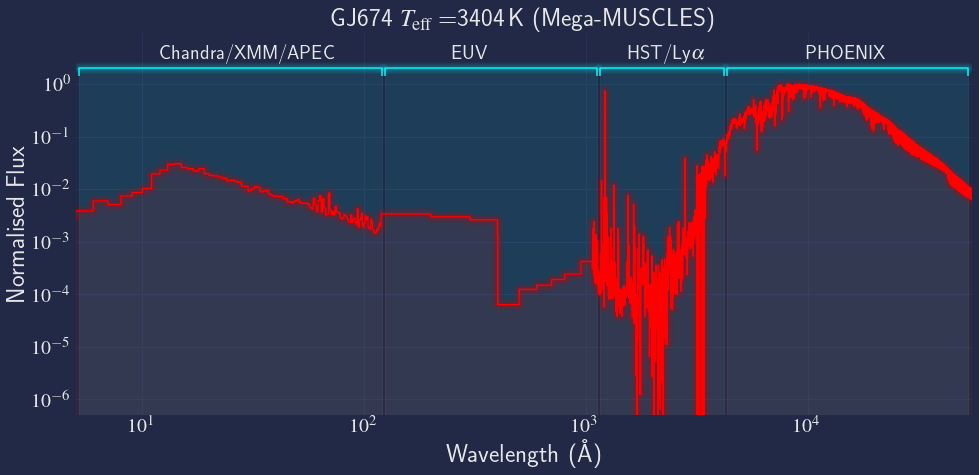

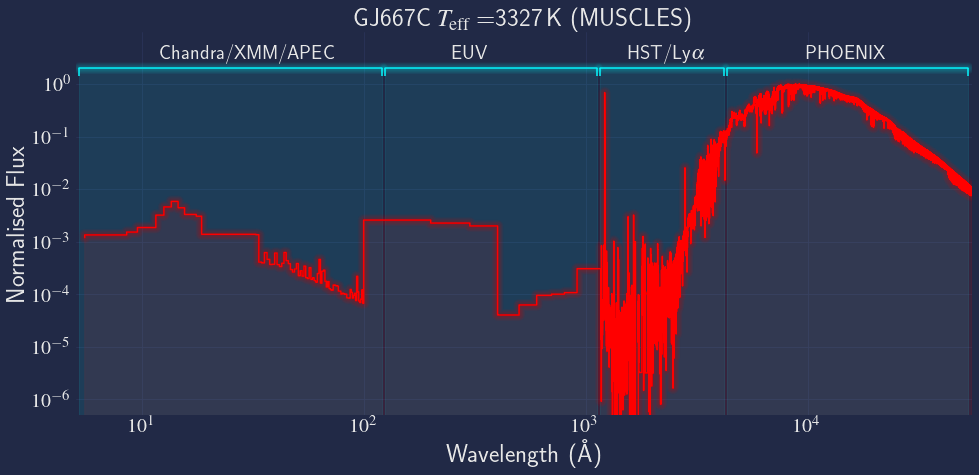

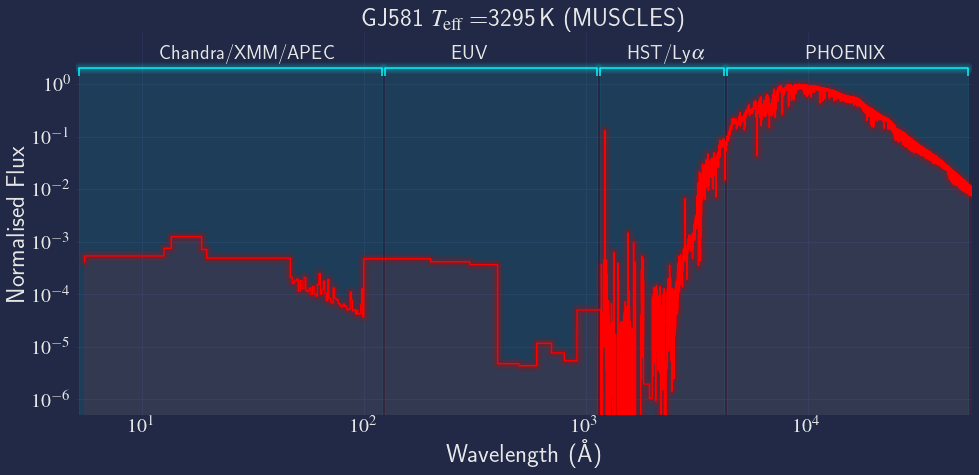

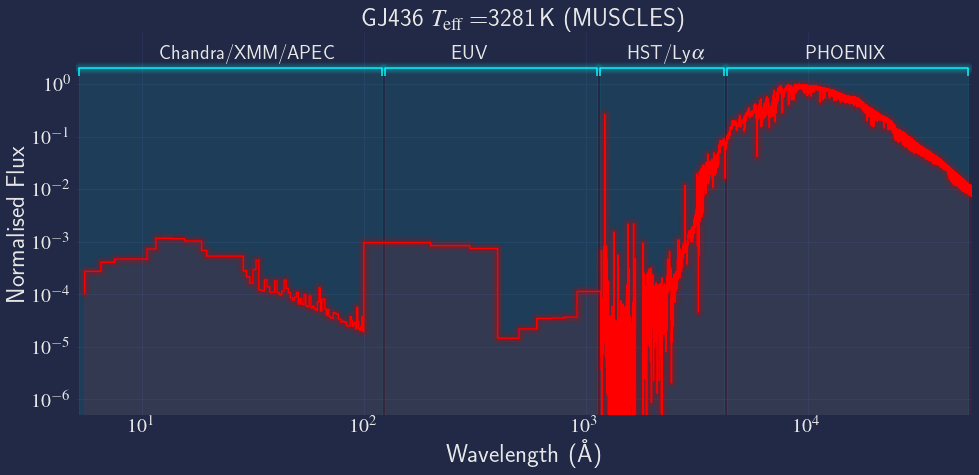

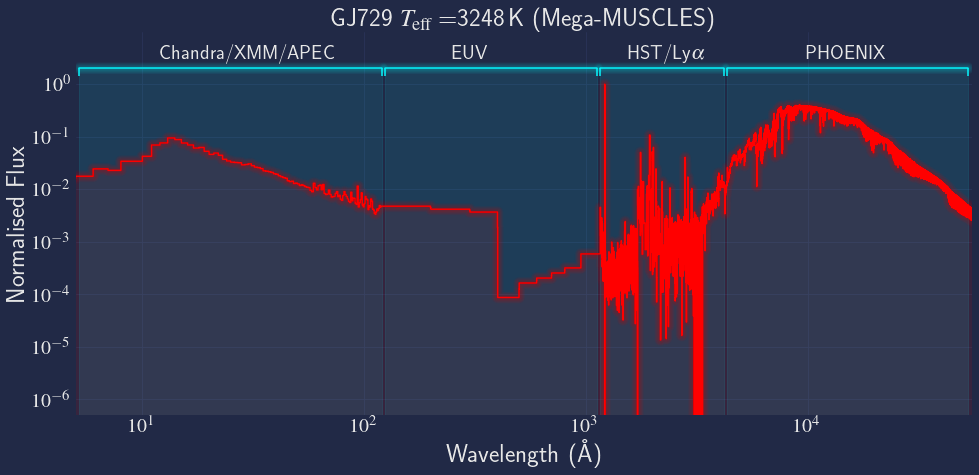

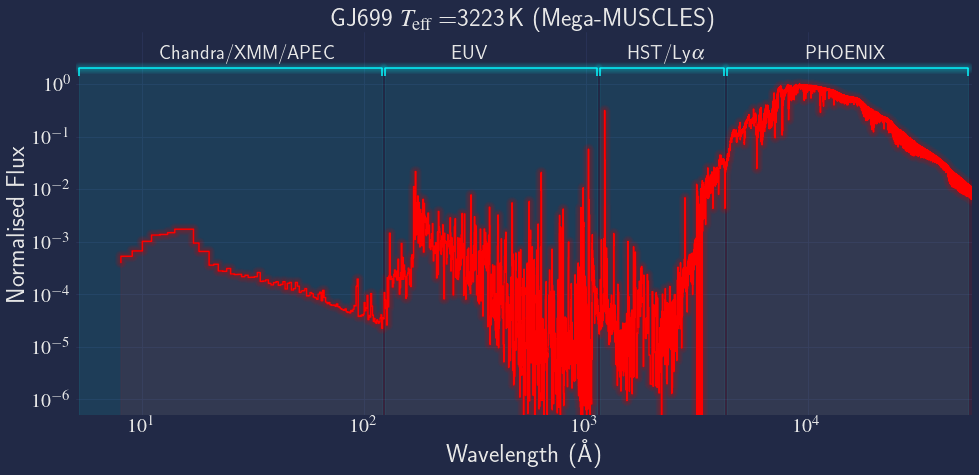

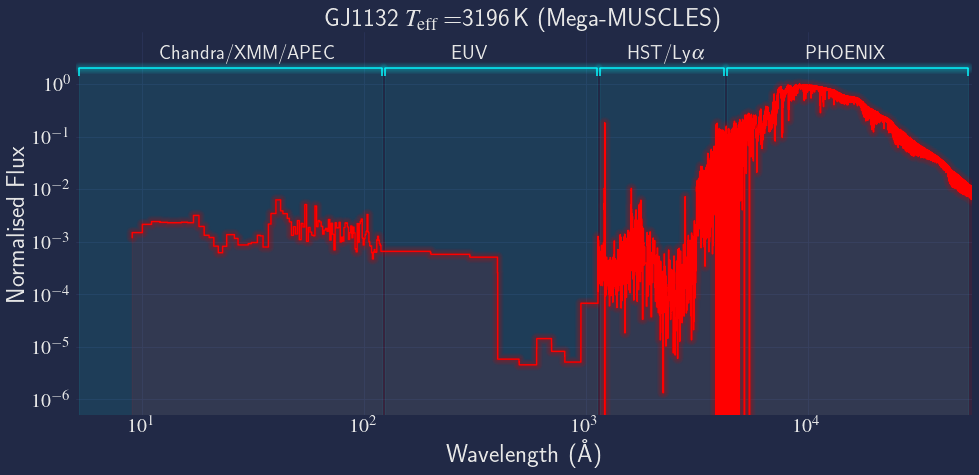

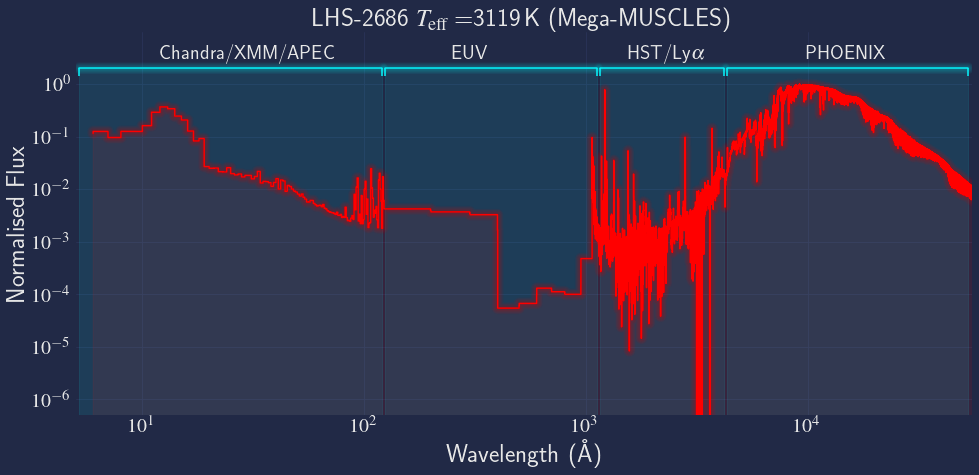

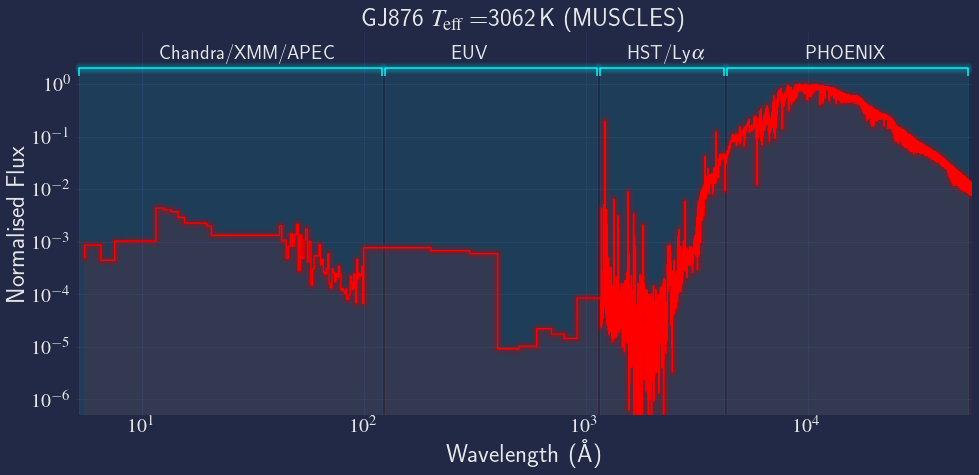

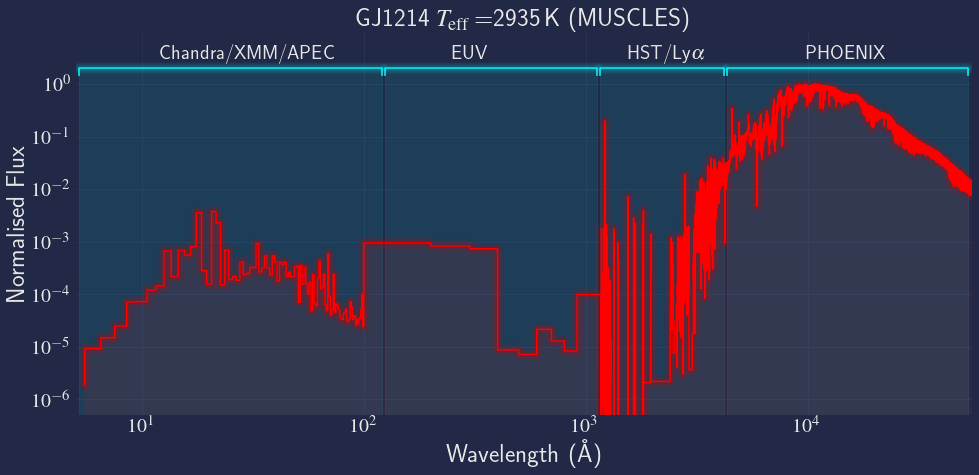

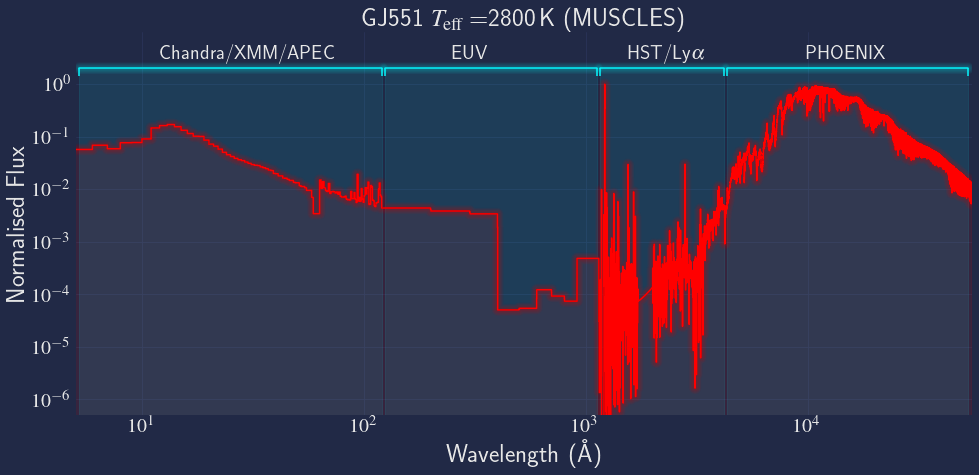

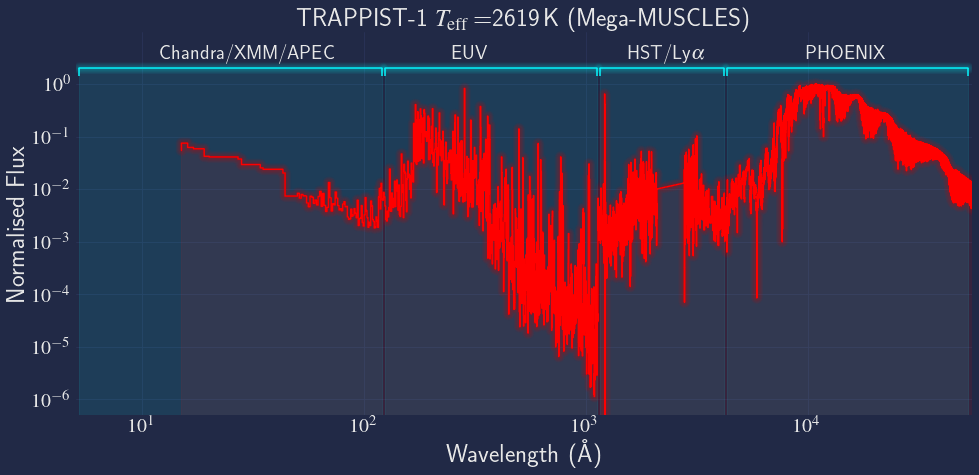

In [9]:


for i, spec in enumerate(specs_sort):
    plt.figure(figsize=(14, 7))

    # print(os.path.split(spec)[1])
    data = fits.getdata(spec, 1)
    w, f = data['WAVELENGTH'], data['FLUX']
    plt.step(w, f/np.max(f), c='C4')
    survey = 'MUSCLES'
    if spec in mMspecs:
        survey = 'Mega-MUSCLES'
    plotname = '{} '.format(stars_sort[i]) + r'$T_{\mathrm{eff}} = $' +'{}\,K ({})'.format(teffs_sort[i], survey)
    plt.title(plotname, size=25)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(5, 55000)
    plt.ylim(5.1e-7, 9.9)
    
    
    labely = 2
    efac = 0.3
    labelfac = 1.5

    # plt.errorbar((6,120),(labely, labely), yerr= [[efac*labely,efac*labely],[0,0]], c ='C0')
    plt.plot((5.2,120),(labely, labely), c ='C0')
    plt.annotate('Chandra/XMM/APEC', (30, labelfac*labely),  ha='center')

#     plt.errorbar((123,1120),(labely, labely), yerr= [[efac*labely,efac*labely],[0,0]], c ='C0')
    plt.plot((124,1120),(labely, labely), c ='C0')
    plt.annotate('EUV', (250, labelfac*labely))

#     plt.errorbar((1160, 4200),(labely, labely), yerr= [[efac*labely,efac*labely],[0,0]], c ='C0')
    plt.plot((1160, 4200),(labely, labely), c ='C0')
    plt.annotate(r'HST/Ly$\alpha$', (2300, labelfac*labely), ha='center')

#     plt.errorbar((4301,  53000),(labely, labely), yerr= [[efac*labely,efac*labely],[0,0]], c ='C0')
    plt.plot((4301,  53000),(labely, labely),  c ='C0')
    plt.annotate('PHOENIX', (15000, labelfac*labely), ha='center')
    
    mplcyberpunk.add_glow_effects()
    
    plt.errorbar((5.2,120),(labely, labely), yerr= [[efac*labely,efac*labely],[0,0]], c ='C0', ls='none')
    plt.errorbar((124,1120),(labely, labely), yerr= [[efac*labely,efac*labely],[0,0]], c ='C0', ls='none')
    plt.errorbar((1160, 4200),(labely, labely), yerr= [[efac*labely,efac*labely],[0,0]], c ='C0', ls='none')
    plt.errorbar((4301,  53000),(labely, labely), yerr= [[efac*labely,efac*labely],[0,0]], c ='C0', ls='none')
    

    # plt.ylabel('Flux (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=25)
    plt.ylabel('Normalised Flux', size=25)
    plt.xlabel('Wavelength (\AA)', size=25)
    plt.tight_layout()
    plt.savefig('cp_plots/{}_bigplot_cp.png'.format(stars_sort[i]), dpi=150)
    plt.show()
    

In [10]:
w[-1]

129998.0

In [11]:
d1 = fits.getdata('/media/david/2tb_ext_hd/hddata/mega_muscles/v10_hlsp/TRAPPIST-1/hlsp_muscles_multi_multi_trappist-1_broadband_v10_adapt-var-res-sed.fits',1)
print(d1['WAVELENGTH'][-1])

9995000.0
